<a href="https://colab.research.google.com/github/lunaB/tutor_resource/blob/main/8%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pip install pykrx

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 245kB 6.3MB/s 


In [4]:
from pykrx import stock
code = "005930"
fundamental = stock.get_market_fundamental_by_date("20150101", "20201030", code, "d")
ohlcv = stock.get_market_ohlcv_by_date("20150101", "20201030", code)

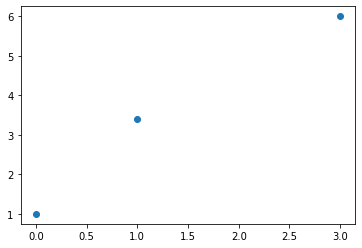

In [23]:
plt.scatter(range(0, 4), [1,3.4,None,6])
plt.show()

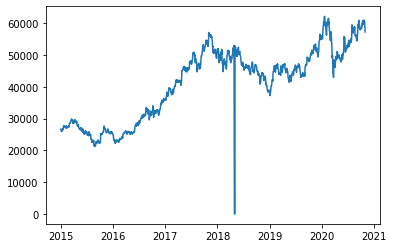

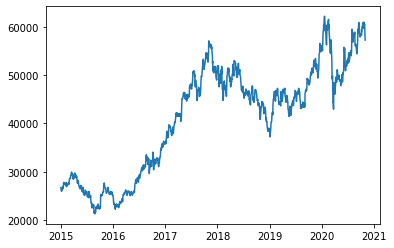

In [26]:
data = ohlcv.loc[:, '고가':'저가']

# arr = np.array([
#     [1,2],
#     [2,3],
#     [3,4],
# ])
# arr.mean(axis=1)
data = data.mean(axis=1)
plt.plot(data)
plt.show()
data = data.replace(0, np.NaN).interpolate()
plt.plot(data)
plt.show()


In [66]:
# 100원 잃었슴
# 200원 잃었슴
# 400원
# 800원

# 주식을 가격이 떨어질 때마다 사는거야
# 떨어진 주식에 소모한 돈보다 내가 지금까지 손해보면서 산 주식들을 전부 파는 가격이 X배 만큼 이익을 볼수 있을때 다 팔아버린다.

# 잼민이
name = '잼민이'
start_money = 100000000
money = start_money
stock = 0

pot = 0
alpha = 1.8
beta = 50

y_price = data[0]
hist = []
hist_pot = []
hist_money = []
hist_stock = []

hist_p = []


for i in range(1, len(data)):
    t_price = data[i]
    if y_price > t_price:
        if money >= t_price * beta:
            stock += beta
            money -= t_price * beta
            pot += t_price * beta
    elif y_price < t_price:
        if pot * alpha < stock * t_price:
            money += stock * t_price
            stock = 0
            pot = 0
    
    y_price = t_price

    hist_pot.append(pot)
    hist_stock.append(stock)
    hist_money.append(money)
    hist.append(money + stock * t_price)

print(start_money)
print(money, stock)
print(money + stock * t_price)

100000000
569575.0 3550
203984575.0


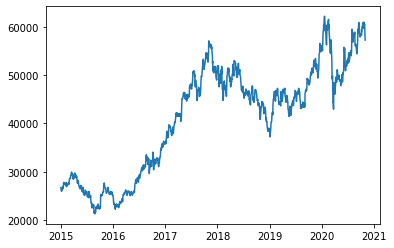

In [68]:
plt.plot(data)
plt.show()

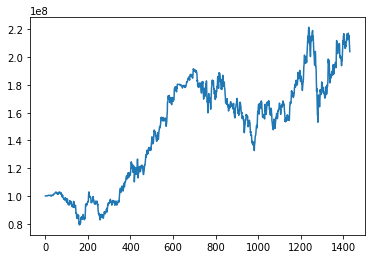

In [69]:
plt.plot(hist)
plt.show()

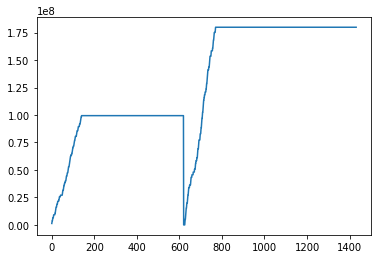

In [70]:
plt.plot(hist_pot)
plt.show()

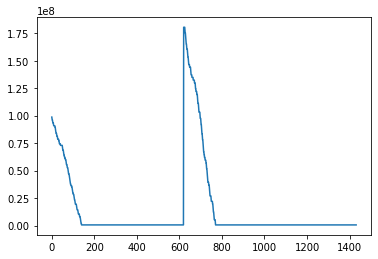

In [71]:
plt.plot(hist_money)
plt.show()

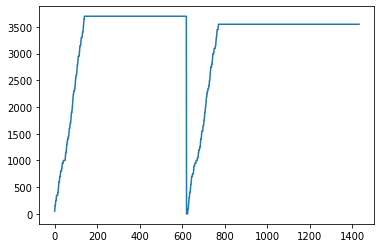

In [72]:
plt.plot(hist_stock)
plt.show()

In [92]:
# 100원 잃었슴
# 200원 잃었슴
# 400원
# 800원

# 주식을 가격이 떨어질 때마다 사는거야
# 떨어진 주식에 소모한 돈보다 내가 지금까지 손해보면서 산 주식들을 전부 파는 가격이 X배 만큼 이익을 볼수 있을때 다 팔아버린다.

# 잼민이
name = '잼민이'
start_money = 100000
money = start_money
stock = 0

pot = 0
alpha = np.linspace(1.2, 1.8, 6)
beta = 1

y_price = data[0]
hist = []
hist_pot = []
hist_money = []
hist_stock = []

hist_p = []

for a in alpha:
    for i in range(1, len(data)):
        t_price = data[i]
        if y_price > t_price:
            if money >= t_price * beta:
                stock += beta
                money -= t_price * beta
                pot += t_price * beta
        elif y_price < t_price:
            if pot * a < stock * t_price:
                money += stock * t_price
                stock = 0
                pot = 0
        
        y_price = t_price

    print('==== alpha : %f ====='%a)
    print(money + stock * t_price, '/', start_money)
    print((money + stock * t_price) / start_money * 100, '%')

==== alpha : 1.200000 =====
229250.0 / 100000
229.25 %
==== alpha : 1.320000 =====
229250.0 / 100000
229.25 %
==== alpha : 1.440000 =====
229250.0 / 100000
229.25 %
==== alpha : 1.560000 =====
229250.0 / 100000
229.25 %
==== alpha : 1.680000 =====
229250.0 / 100000
229.25 %
==== alpha : 1.800000 =====
229250.0 / 100000
229.25 %
